Extraigo el data set de https://finance.yahoo.com/quote/MSFT/history/. De acá busco todo el archivo con la mayor cantidad de datos. 

In [2]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060055,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062199,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063272,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061663,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060591,47894400


Queremos quedarnos únicamente con la fecha y el precio al cierre. 

In [3]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9618,2024-05-13,413.720001
9619,2024-05-14,416.559998
9620,2024-05-15,423.079987
9621,2024-05-16,420.989990


¿En qué formato están las fechas?

In [4]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9618    2024-05-13
9619    2024-05-14
9620    2024-05-15
9621    2024-05-16
9622    2024-05-17
Name: Date, Length: 9623, dtype: object

El formato es tipo "string" y quisieramos tenerla en un formato tipo "fecha" de modo que podamos utilizarla luego para graficar o analizar. Para esto importamos la librería "datetime", para poder escribir estos string como fecha.

In [5]:
import datetime

# Generamos una función "str_to_date"

def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)

In [7]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9618   2024-05-13
9619   2024-05-14
9620   2024-05-15
9621   2024-05-16
9622   2024-05-17
Name: Date, Length: 9623, dtype: datetime64[ns]

Ahora vemos que el tipo de esta columna es "datetime64". 

In [8]:
df.index = df.pop('Date')

df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-05-13,413.720001
2024-05-14,416.559998
2024-05-15,423.079987


Vamos a graficar a ver cómo se ven los datos que tenemos

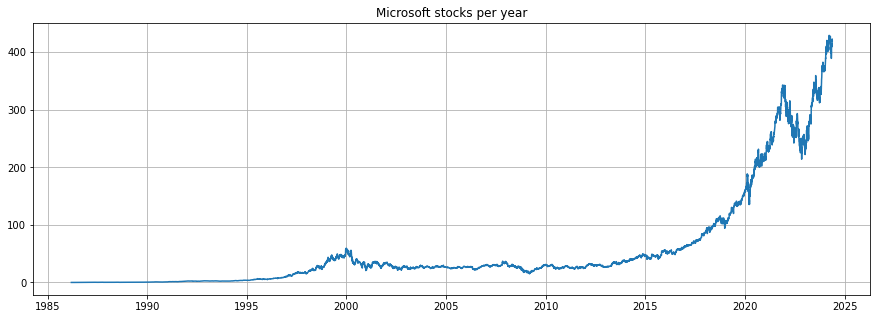

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df)
plt.title('Microsoft stocks per year')
plt.grid()
plt.show()

In [10]:
import numpy as np

Vamos a generar las columnas con los lags de los targets. Vamos a hacer tres lags. 

In [11]:
df['Lag1'] = df['Close'].shift(1)
df['Lag2'] = df['Lag1'].shift(1)
df['Lag3'] = df['Lag2'].shift(1)

df.tail(5)

,Close,Lag1,Lag2,Lag3
Date,,,,
2024-05-13,413.720001,414.739990,412.320007,410.540009
2024-05-14,416.559998,413.720001,414.739990,412.320007
2024-05-15,423.079987,416.559998,413.720001,414.739990
2024-05-16,420.989990,423.079987,416.559998,413.720001
2024-05-17,420.209991,420.989990,423.079987,416.559998


In [12]:
df.head(2).tail(1).index.values[0]

numpy.datetime64('1986-03-14T00:00:00.000000000')

In [13]:
df.head(2).tail(1).index

DatetimeIndex(['1986-03-14'], dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
df.head(2).tail(1)

,Close,Lag1,Lag2,Lag3
Date,,,,
1986-03-14,0.100694,0.097222,NaN,NaN


In [15]:
df.head(2)

,Close,Lag1,Lag2,Lag3
Date,,,,
1986-03-13,0.097222,NaN,NaN,NaN
1986-03-14,0.100694,0.097222,NaN,NaN


In [16]:
# Esta función define un data frame entre una primera y una segunda fecha. El "n" define el número de días de lag.

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date 
  
    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
    
        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return #control para que tire error si no hay suficientes días para hacer el lag.

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year, month, day = next_date_str.split('-')
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
  
    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
  
    ret_df['Target'] = Y

    return ret_df

In [35]:
windowed_df = df_to_windowed_df(df, 
                                '2022-03-01', 
                                '2024-03-01', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-01,294.589996,297.309998,298.790009,294.950012
1,2022-03-02,297.309998,298.790009,294.950012,300.190002
2,2022-03-03,298.790009,294.950012,300.190002,295.920013
3,2022-03-04,294.950012,300.190002,295.920013,289.859985
4,2022-03-07,300.190002,295.920013,289.859985,278.910004
...,...,...,...,...,...
499,2024-02-26,402.179993,411.649994,410.339996,407.540009
500,2024-02-27,411.649994,410.339996,407.540009,407.480011
501,2024-02-28,410.339996,407.540009,407.480011,407.720001
502,2024-02-29,407.540009,407.480011,407.720001,413.640015


Ahora tenemos que convertir estos data frame en arreglos de numpy para poder usarlos como inputs en la red. Además vamos a separar entre X e y. Es decir, los X van a ser una matriz donde cada columna tenga los valores de alguna variable (los lags) y el 'y' será el vector columna de los targets.

In [36]:
def windowed_df_to_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

In [37]:
dates, X, y = windowed_df_to_X_y(windowed_df)

Vamos ahora a separar la data en un conjunto de entrenamiento, uno de testeo y otro de validación.

In [38]:
# Índices

ind_val = int(len(dates)*0.8)
ind_test = int(len(dates)*0.9)

dates_train, X_train, y_train = dates[:ind_val], X[:ind_val], y[:ind_val]
dates_val, X_val, y_val = dates[ind_val:ind_test], X[ind_val:ind_test], y[ind_val:ind_test]
dates_test, X_test, y_test = dates[ind_test:], X[ind_test:], y[ind_test:]

Vamos a graficar para ver a qué conjunto de datos corresponde cada set.

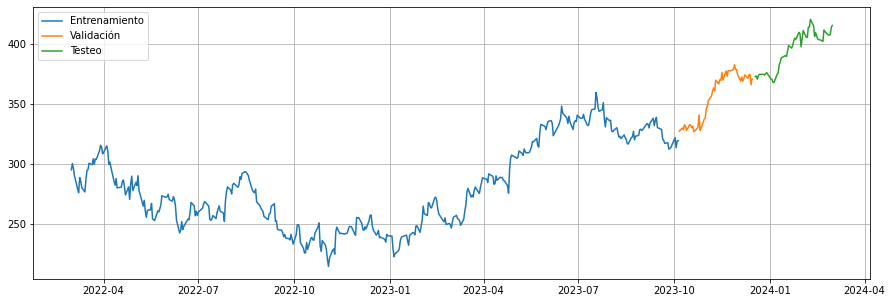

In [39]:
plt.figure(figsize=(15,5))

plt.plot(dates_train, y_train, label = 'Entrenamiento')
plt.plot(dates_val, y_val, label = 'Validación')
plt.plot(dates_test, y_test, label = 'Testeo')

plt.grid()
plt.legend()
plt.show()

# RED NEURONAL

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50)

Epoch 1/50
13/13 [==============================] - 3s 43ms/step - loss: 79260.3906 - mean_absolute_error: 279.3609 - val_loss: 125551.7031 - val_mean_absolute_error: 353.7825
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 78305.6953 - mean_absolute_error: 277.6479 - val_loss: 124273.3828 - val_mean_absolute_error: 351.9711
Epoch 3/50
13/13 [==============================] - 0s 7ms/step - loss: 77130.9922 - mean_absolute_error: 275.5188 - val_loss: 122297.0391 - val_mean_absolute_error: 349.1522
Epoch 4/50
13/13 [==============================] - 0s 8ms/step - loss: 75184.9609 - mean_absolute_error: 271.9714 - val_loss: 119210.7188 - val_mean_absolute_error: 344.7038
Epoch 5/50
13/13 [==============================] - 0s 7ms/step - loss: 71939.7344 - mean_absolute_error: 265.9038 - val_loss: 113067.2266 - val_mean_absolute_error: 335.6736
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 66440.3750 - mean_absolute_error: 255.3557 - val_los

Epoch 49/50
13/13 [==============================] - 0s 6ms/step - loss: 42.6905 - mean_absolute_error: 5.1693 - val_loss: 598.8472 - val_mean_absolute_error: 20.5421
Epoch 50/50
13/13 [==============================] - 0s 6ms/step - loss: 43.3697 - mean_absolute_error: 5.1793 - val_loss: 603.1023 - val_mean_absolute_error: 20.9735


13/13 [==============================] - 0s 2ms/step


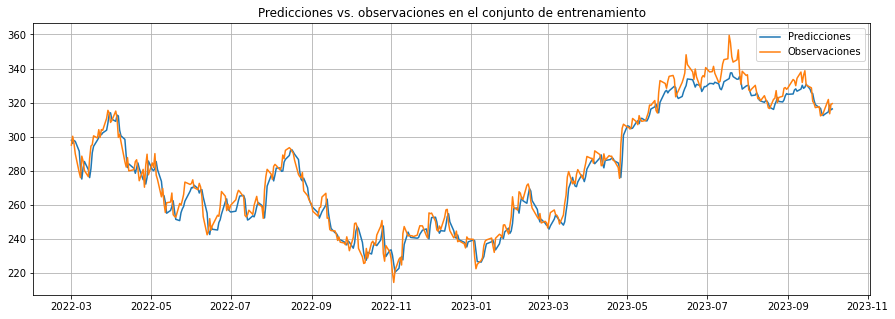

In [56]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize = (15,5))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.grid()
plt.title('Predicciones vs. observaciones en el conjunto de entrenamiento')
plt.legend(['Predicciones', 'Observaciones'])
plt.show()

Predicciones en el conjunto de validación

2/2 [==============================] - 0s 5ms/step


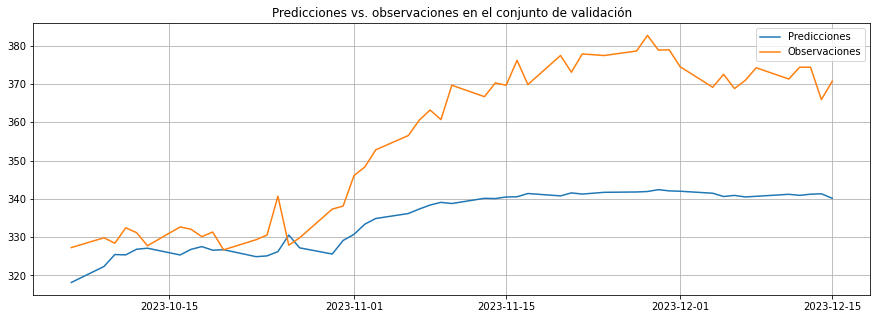

In [57]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize = (15,5))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.grid()
plt.title('Predicciones vs. observaciones en el conjunto de validación')
plt.legend(['Predicciones', 'Observaciones'])
plt.show()

Lo mismo para el conjunto de testeo

2/2 [==============================] - 0s 0s/step


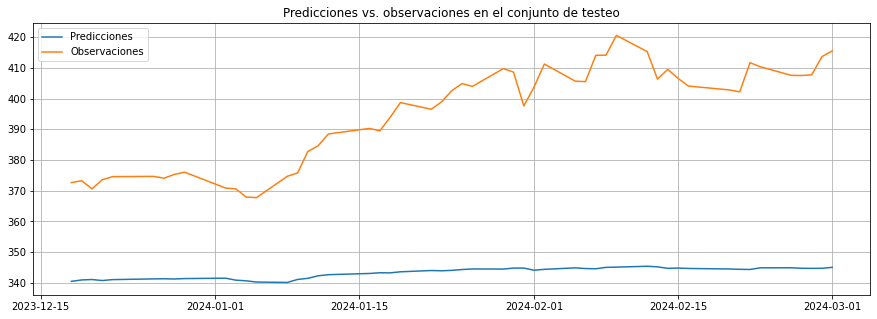

In [58]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize = (15,5))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.grid()
plt.title('Predicciones vs. observaciones en el conjunto de testeo')
plt.legend(['Predicciones', 'Observaciones'])
plt.show()

En los conjuntos de validación y testeo las predicciones fallan porque en esas fechas los stocks tuvieron un aumento muy abrupto. Es imposible predecir este aumento con los datos que se tienen porque en las fechas con que fue entrenada la red las fluctuaciones eran de amplitudes menores. Probablemente si tomamos un conjunto de fechas más cercanas a la actualidad si se puedan ver estas fluctuaciones. 

In [59]:
windowed_df = df_to_windowed_df(df, 
                                '2023-03-01', 
                                '2024-03-01', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-03-01,249.220001,250.160004,249.419998,246.270004
1,2023-03-02,250.160004,249.419998,246.270004,251.110001
2,2023-03-03,249.419998,246.270004,251.110001,255.289993
3,2023-03-06,246.270004,251.110001,255.289993,256.869995
4,2023-03-07,251.110001,255.289993,256.869995,254.149994
...,...,...,...,...,...
248,2024-02-26,402.179993,411.649994,410.339996,407.540009
249,2024-02-27,411.649994,410.339996,407.540009,407.480011
250,2024-02-28,410.339996,407.540009,407.480011,407.720001
251,2024-02-29,407.540009,407.480011,407.720001,413.640015


In [60]:
dates, X, y = windowed_df_to_X_y(windowed_df)

In [61]:
# Índices

ind_val = int(len(dates)*0.8)
ind_test = int(len(dates)*0.9)

dates_train, X_train, y_train = dates[:ind_val], X[:ind_val], y[:ind_val]
dates_val, X_val, y_val = dates[ind_val:ind_test], X[ind_val:ind_test], y[ind_val:ind_test]
dates_test, X_test, y_test = dates[ind_test:], X[ind_test:], y[ind_test:]

In [66]:
model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 80ms/step - loss: 105932.8047 - mean_absolute_error: 324.0274 - val_loss: 144926.6875 - val_mean_absolute_error: 380.5434
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 105698.3281 - mean_absolute_error: 323.6655 - val_loss: 144664.0469 - val_mean_absolute_error: 380.1982
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 105444.5859 - mean_absolute_error: 323.2719 - val_loss: 144340.2656 - val_mean_absolute_error: 379.7721
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 105149.6797 - mean_absolute_error: 322.8141 - val_loss: 143918.7812 - val_mean_absolute_error: 379.2168
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 104736.1562 - mean_absolute_error: 322.1749 - val_loss: 143348.7656 - val_mean_absolute_error: 378.4644
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 104221.1953 - mean_absolute_error: 321.3752 - val_l

7/7 [==============================] - 0s 10ms/step - loss: 939.4989 - mean_absolute_error: 23.1641 - val_loss: 3334.9175 - val_mean_absolute_error: 56.7583
Epoch 49/100
7/7 [==============================] - 0s 9ms/step - loss: 939.3989 - mean_absolute_error: 23.1563 - val_loss: 3336.2625 - val_mean_absolute_error: 56.7703
Epoch 50/100
7/7 [==============================] - 0s 9ms/step - loss: 940.2578 - mean_absolute_error: 23.2199 - val_loss: 3389.9688 - val_mean_absolute_error: 57.2418
Epoch 51/100
7/7 [==============================] - 0s 9ms/step - loss: 938.7720 - mean_absolute_error: 23.2192 - val_loss: 3371.0203 - val_mean_absolute_error: 57.0760
Epoch 52/100
7/7 [==============================] - 0s 10ms/step - loss: 932.7695 - mean_absolute_error: 23.2168 - val_loss: 3488.9924 - val_mean_absolute_error: 58.1178
Epoch 53/100
7/7 [==============================] - 0s 9ms/step - loss: 920.1422 - mean_absolute_error: 23.0156 - val_loss: 3456.0867 - val_mean_absolute_error: 57.84

Epoch 97/100
7/7 [==============================] - 0s 12ms/step - loss: 52.0077 - mean_absolute_error: 5.4826 - val_loss: 326.6900 - val_mean_absolute_error: 16.3690
Epoch 98/100
7/7 [==============================] - 0s 10ms/step - loss: 51.4625 - mean_absolute_error: 5.6254 - val_loss: 338.4586 - val_mean_absolute_error: 16.7925
Epoch 99/100
7/7 [==============================] - 0s 9ms/step - loss: 45.3340 - mean_absolute_error: 5.2942 - val_loss: 272.0689 - val_mean_absolute_error: 14.6014
Epoch 100/100
7/7 [==============================] - 0s 11ms/step - loss: 48.6820 - mean_absolute_error: 5.5294 - val_loss: 395.5139 - val_mean_absolute_error: 18.6536


7/7 [==============================] - 0s 4ms/step


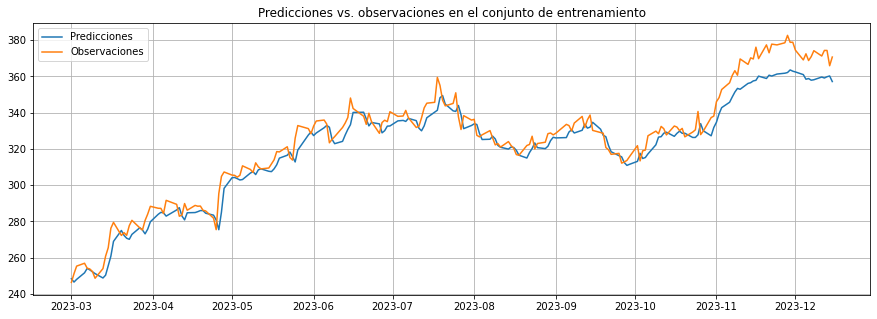

In [67]:
train_predictions = model.predict(X_train).flatten()

plt.figure(figsize = (15,5))
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.grid()
plt.title('Predicciones vs. observaciones en el conjunto de entrenamiento')
plt.legend(['Predicciones', 'Observaciones'])
plt.show()

1/1 [==============================] - 0s 16ms/step


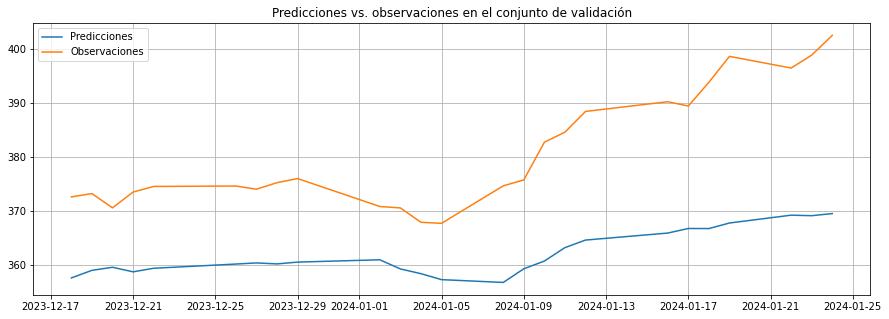

In [68]:
val_predictions = model.predict(X_val).flatten()

plt.figure(figsize = (15,5))
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.grid()
plt.title('Predicciones vs. observaciones en el conjunto de validación')
plt.legend(['Predicciones', 'Observaciones'])
plt.show()

1/1 [==============================] - 0s 16ms/step


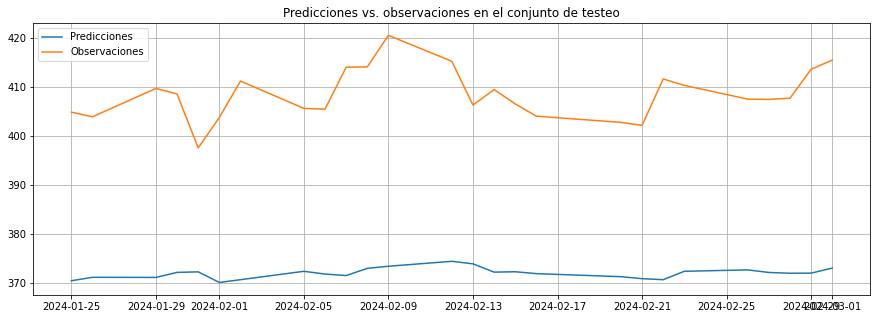

In [69]:
test_predictions = model.predict(X_test).flatten()

plt.figure(figsize = (15,5))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.grid()
plt.title('Predicciones vs. observaciones en el conjunto de testeo')
plt.legend(['Predicciones', 'Observaciones'])
plt.show()

Acá vemos que pasa lo mismo que antes justo en la parte del conjunto de entrenamiento donde se produce el mayor aumento relativo.

La conclusión es que no se puede predecir grandes incrementos o caídas en las acciones. 